In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gene_transcript_go_api as gtga

In [2]:
human = gtga.parse_input("../data/human_input.tsv")
mouse = gtga.parse_input("../data/mouse_input.tsv")

In [3]:
human_path = "../res/human.intragene_isoform_diversity.data.tsv"
mouse_path = "../res/mouse.intragene_isoform_diversity.data.tsv"

In [4]:
human_df = pd.read_csv(human_path, sep='\t')
mouse_df = pd.read_csv(mouse_path, sep='\t')

In [11]:
human_df["With empty transcript"] = human_df["Gene"].apply(human.get_gene).apply(gtga.Gene.is_an_isoform_without_go)
mouse_df["With empty transcript"] = human_df["Gene"].apply(human.get_gene).apply(gtga.Gene.is_an_isoform_without_go)


In [19]:
def makeplot(species, typ, which, corr, trend, x, y):
    if species == "human":
        data = human_df
    elif species == "mouse":
        data = mouse_df
    else:
        raise ValueError("species can only be 'human' or 'mouse'")
    
    if typ == "expected":
        data = data[data['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)
    elif typ == "observed":
        data = data[data['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
    else:
        raise ValueError("uncorrect typ")
    
    if which == "multi":
        data = data[data["Number of isoform"] != 1]
    elif which == "all":
        pass
    else:
        raise ValueError("uncorrect which")


    print(corr + " coefficient is", data[x].corr(data[y], corr))
    plot = sns.scatterplot(
        data = data,
        x = x,
        y = y
    )
    if trend == "median":
        med = data.drop(["With empty transcript"], axis = 1).groupby(x).median()
        plt.scatter(x=med.index, y=med[y],color="red",s=5)
    elif trend == "mean":
        med = data.drop(["With empty transcript"], axis = 1).groupby(x).mean()
        plt.scatter(x=med.index, y=med[y],color="red",s=5)
    elif trend == 'nogo':
        med = data[data["With empty transcript"]]
        plt.scatter(x=med[x], y=med[y],color='red',s=5)
    elif trend == "none":
        pass
    else:
        raise ValueError("trend should be 'none', 'median' or 'mean' or 'nogo")
    plot.set_title("DATASET : " + typ + " data in " + species)

spearman coefficient is 0.7970220727743191


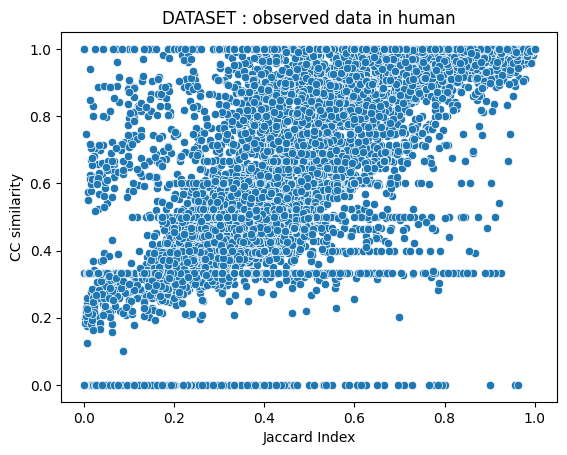

In [39]:
makeplot("human", "observed", "multi", "spearman", 'none', "Jaccard Index", "CC similarity")

spearman coefficient is -0.0639075931157434


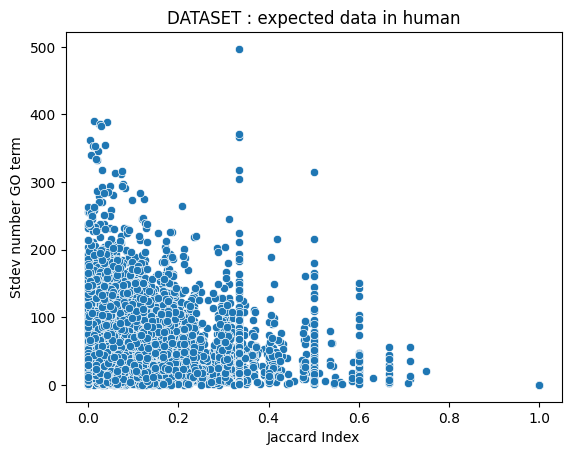

In [37]:
makeplot("human", "expected", "multi", "spearman", 'none', "Jaccard Index", "Stdev number GO term")

In [27]:
human_obs = human_df[human_df['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
mouse_obs = mouse_df[mouse_df['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
human_exp = human_df[human_df['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)
mouse_exp = mouse_df[mouse_df['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)

human_obs = human_obs[human_obs["Number of isoform"] != 1]
mouse_obs = mouse_obs[mouse_obs["Number of isoform"] != 1]
human_exp = human_exp[human_exp["Number of isoform"] != 1]
mouse_exp = mouse_exp[mouse_exp["Number of isoform"] != 1]

Text(0.5, 1.0, 'Human Obs Spearman')

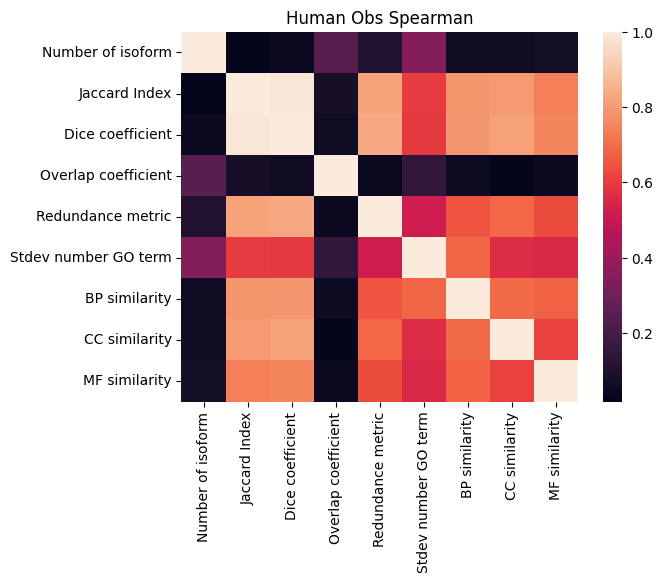

In [77]:
corr = human_obs.corr('spearman')
corr
plot = sns.heatmap(abs(corr), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plot.set_title("Human Obs Spearman")

In [28]:
print(len(human_obs["Overlap coefficient"]))

print(sum(human_obs["With empty transcript"]==1))

14128
9035
